In [37]:
# required imports
# %pip install yfinance cvxopt
import cvxpy as cp

import pandas as pd
import yfinance as yf
import datetime
import numpy as np
import matplotlib.pyplot as plt
import random

import yfinance as yf

### Gather 10 asset closing prices and calculate returns

In [38]:
start_date = '2022-10-30' # start date
end_date = '2024-01-30' # end date

In [57]:
tickers = ["RELIANCE.NS", "COALINDIA.NS", "KOTAKBANK.NS", "BAJAJ-AUTO.NS", "ITC.NS", "BAJAJFINSV.NS", "ADANIENT.NS", "INDUSINDBK.NS", "HEROMOTOCO.NS", "TATASTEEL.NS"] #10 risky assets
prices = yf.download(tickers, start=start_date, end=end_date)['Close']  # closing price
returns = prices.pct_change().dropna()  # calc percentage change
print(returns.shape)
returns.head()

[*********************100%%**********************]  10 of 10 completed


(307, 10)


Ticker,ADANIENT.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,COALINDIA.NS,HEROMOTOCO.NS,INDUSINDBK.NS,ITC.NS,KOTAKBANK.NS,RELIANCE.NS,TATASTEEL.NS
Date,,,,,,,,,,
2022-11-01,0.068186,0.016572,0.012770,-0.001220,-0.001382,0.007439,0.002294,0.003812,-0.007746,-0.003447
2022-11-02,0.001398,0.001098,0.000790,0.000611,-0.010923,-0.011250,0.014735,0.000393,0.006245,0.000494
2022-11-03,0.002709,0.009821,0.007659,0.001627,0.000908,0.008610,-0.002679,-0.005131,0.003732,0.007407
2022-11-04,0.067639,-0.000636,0.044793,-0.000609,-0.021709,0.004094,-0.000283,-0.000105,0.014715,0.026961
2022-11-07,0.033222,-0.000331,-0.012578,0.014225,0.012418,-0.007417,-0.000283,-0.009132,0.005342,0.018616


In [58]:
returns_log = np.log(prices / prices.shift(1)).dropna()
returns_log.head()

Ticker,ADANIENT.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,COALINDIA.NS,HEROMOTOCO.NS,INDUSINDBK.NS,ITC.NS,KOTAKBANK.NS,RELIANCE.NS,TATASTEEL.NS
Date,,,,,,,,,,
2022-11-01,0.065962,0.016436,0.012690,-0.001221,-0.001383,0.007411,0.002292,0.003805,-0.007776,-0.003453
2022-11-02,0.001397,0.001098,0.000790,0.000610,-0.010984,-0.011313,0.014628,0.000393,0.006226,0.000494
2022-11-03,0.002705,0.009773,0.007630,0.001626,0.000907,0.008573,-0.002682,-0.005144,0.003725,0.007380
2022-11-04,0.065449,-0.000636,0.043818,-0.000609,-0.021948,0.004086,-0.000283,-0.000105,0.014608,0.026604
2022-11-07,0.032683,-0.000332,-0.012658,0.014125,0.012342,-0.007445,-0.000283,-0.009174,0.005328,0.018445


### Visualising returns

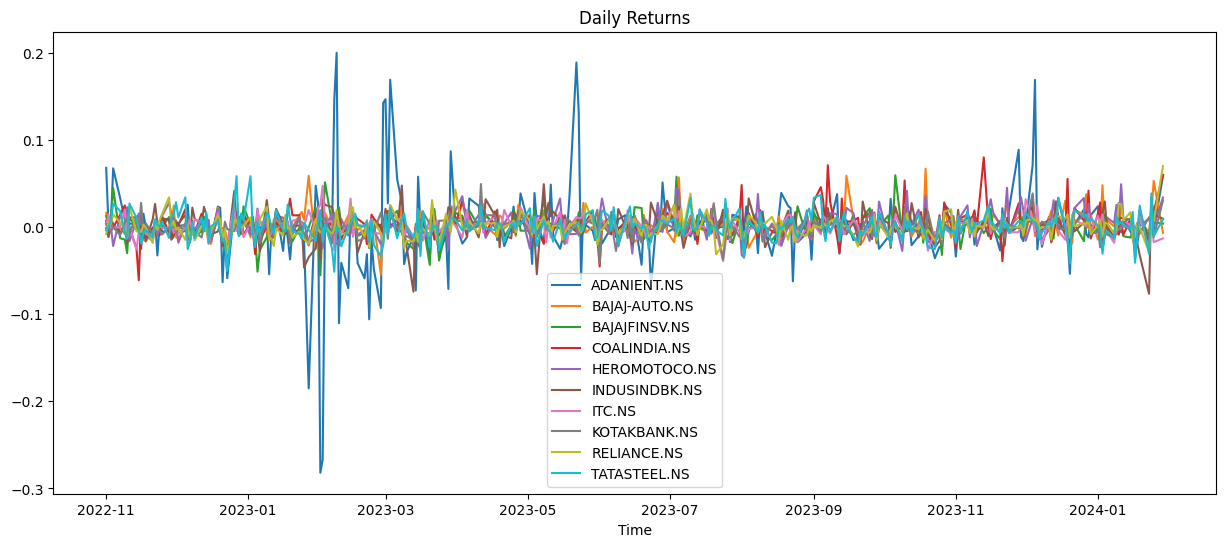

In [59]:
plt.figure(figsize=(15,6))
for col in returns.columns:
  plt.plot(returns[col], label=col)
plt.title("Daily Returns")
plt.xlabel("Time")
plt.legend()
plt.show()

### Markowitz's Optimisation and Frontier

In [60]:
# calc mean of assets
mu = returns.mean()
mu

Ticker
ADANIENT.NS      0.000717
BAJAJ-AUTO.NS    0.002443
BAJAJFINSV.NS   -0.000003
COALINDIA.NS     0.001812
HEROMOTOCO.NS    0.001864
INDUSINDBK.NS    0.001075
ITC.NS           0.000889
KOTAKBANK.NS    -0.000082
RELIANCE.NS      0.000746
TATASTEEL.NS     0.001039
dtype: float64

In [61]:
cov_matrix = returns.cov()
c = np.array(cov_matrix)
cov_matrix

Ticker,ADANIENT.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,COALINDIA.NS,HEROMOTOCO.NS,INDUSINDBK.NS,ITC.NS,KOTAKBANK.NS,RELIANCE.NS,TATASTEEL.NS
Ticker,,,,,,,,,,
ADANIENT.NS,0.001947,0.000060,0.000157,0.000098,0.000094,0.000114,-0.000032,0.000075,0.000145,0.000093
BAJAJ-AUTO.NS,0.000060,0.000189,0.000030,0.000021,0.000075,0.000034,0.000023,0.000015,0.000018,0.000036
BAJAJFINSV.NS,0.000157,0.000030,0.000193,0.000043,0.000039,0.000092,0.000014,0.000033,0.000048,0.000053
COALINDIA.NS,0.000098,0.000021,0.000043,0.000251,0.000041,0.000061,0.000025,0.000040,0.000049,0.000076
HEROMOTOCO.NS,0.000094,0.000075,0.000039,0.000041,0.000208,0.000033,0.000016,0.000025,0.000037,0.000052
INDUSINDBK.NS,0.000114,0.000034,0.000092,0.000061,0.000033,0.000260,0.000028,0.000043,0.000063,0.000054
ITC.NS,-0.000032,0.000023,0.000014,0.000025,0.000016,0.000028,0.000119,0.000026,0.000033,0.000038
KOTAKBANK.NS,0.000075,0.000015,0.000033,0.000040,0.000025,0.000043,0.000026,0.000113,0.000039,0.000026
RELIANCE.NS,0.000145,0.000018,0.000048,0.000049,0.000037,0.000063,0.000033,0.000039,0.000141,0.000065


In [44]:
# random weights between 0 and 1 which sum to 1
def rand_weights(n):
    k = np.random.rand(n)
    return k / sum(k)

num_portfolios = len(tickers)
sigmas = []
mus = []
sharpe_ratio = []

for i in range(10000):
  # print("Iteration", i)
  w = rand_weights(num_portfolios).T
  # shape of w is (10,1)
  # print("Weights ", i ," : ", w)

  mu1 = np.array(mu)@w
  sigma = w.T@c@w
  sigmas.append(sigma**0.5)
  mus.append(mu1)
  sharpe_ratio.append((sigma**0.5)/mu1)
# print(mus)
# print(sigmas)

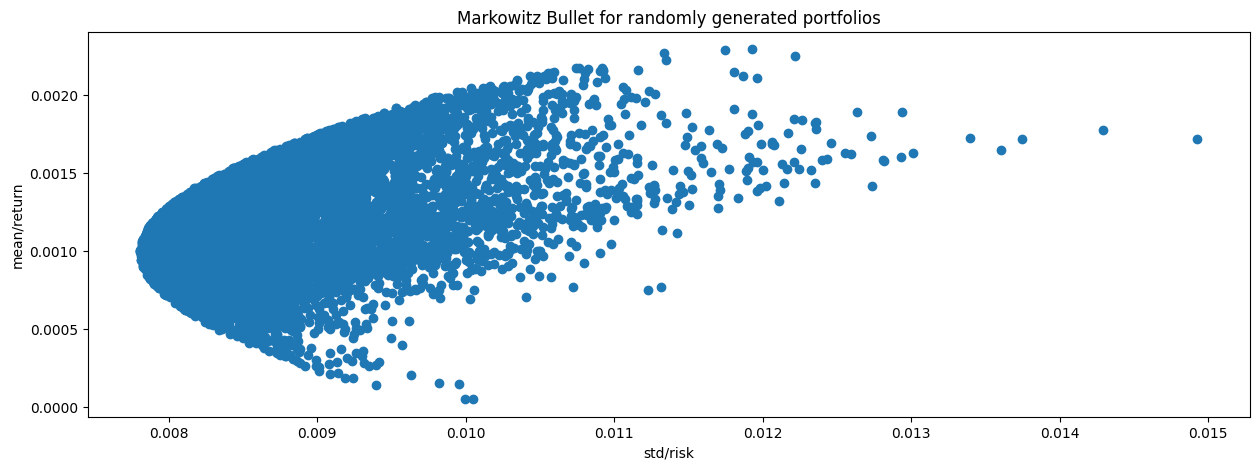

In [45]:
plt.figure(figsize=(15,5))
plt.scatter(sigmas, mus)
plt.xlabel('std/risk')
plt.ylabel('mean/return')
plt.title('Markowitz Bullet for randomly generated portfolios')
plt.show()

### Efficient frontier - Maximise return for given risk

In [46]:
mu= np.array(mu)
n_assets = len(tickers)
w = cp.Variable(n_assets)
target_sigma = cp.Parameter(nonneg=True)

mu1 = mu @ w  # expected return
objective = cp.Maximize(mu1)
constraints = [cp.sum(w) == 1, cp.quad_form(w, c) <= target_sigma**2]

frontier_weights = []
frontier_returns = []

# chosen_sigmas = random.choices(sigmas, k=2)
# print(chosen_sigmas)

for sigma in sigmas:
    target_sigma.value = sigma
    problem = cp.Problem(objective, constraints)
    try:
        problem.solve(solver=cp.ECOS)
        if problem.status == 'optimal':
            frontier_weights.append(w.value)
            frontier_returns.append(mu1.value)
    except:
        continue

/usr/local/lib/python3.10/dist-packages/cvxpy/reductions/solvers/solving_chain.py:213: UserWarning: You are solving a parameterized problem that is not DPP. Because the problem is not DPP, subsequent solves will not be faster than the first one. For more information, see the documentation on Discplined Parametrized Programming, at
	https://www.cvxpy.org/tutorial/advanced/index.html#disciplined-parametrized-programming
  warnings.warn(dpp_error_msg)


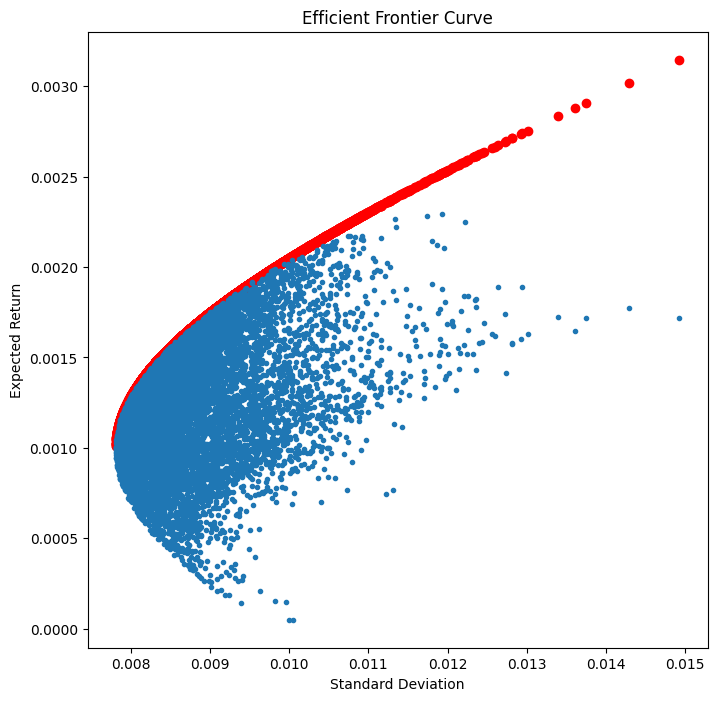

In [47]:
#plot
plt.subplots(figsize=(8,8))
plt.scatter(sigmas, frontier_returns,c='r')
plt.plot(sigmas, mus, '.')
plt.title('Efficient Frontier Curve')
plt.xlabel('Standard Deviation')
plt.ylabel('Expected Return')
plt.show()

In [48]:
len(frontier_returns)

10000

### Maximise return for two given risk values

In [49]:
mu = np.array(mu)

n_assets = len(tickers)
w = cp.Variable(n_assets)
target_sigma = cp.Parameter(nonneg=True)

mu1 = mu @ w  # expected return
objective = cp.Maximize(mu1)
constraints = [cp.sum(w) == 1, cp.quad_form(w, c) <= target_sigma**2]

frontier_weights_new = []
frontier_returns_new = []

chosen_sigmas_new = random.choices(sigmas, k=2)
print(chosen_sigmas_new)

for sigma in chosen_sigmas_new:
    target_sigma.value = sigma
    problem = cp.Problem(objective, constraints)
    try:
        problem.solve(solver=cp.ECOS)
        if problem.status == 'optimal':
            frontier_weights_new.append(w.value)
            frontier_returns_new.append(mu1.value)
    except:
        continue

[0.008879495740478246, 0.00787396099470241]


In [56]:
frontier_weights_new

[array([-0.00472967,  0.51872405, -0.21414085,  0.29216718,  0.22449012,
         0.12391457,  0.23648945, -0.2828412 ,  0.11541018, -0.00948382]),
 array([-0.00485035,  0.51087547, -0.20755893,  0.28732779,  0.22148608,
         0.12159843,  0.2366288 , -0.2722212 ,  0.11543178, -0.00871786])]


In [51]:
chosen_sigmas_new

[0.008879495740478246, 0.00787396099470241]

In [52]:
frontier_returns_new

[0.001706412397377907, 0.0011600649137047492]

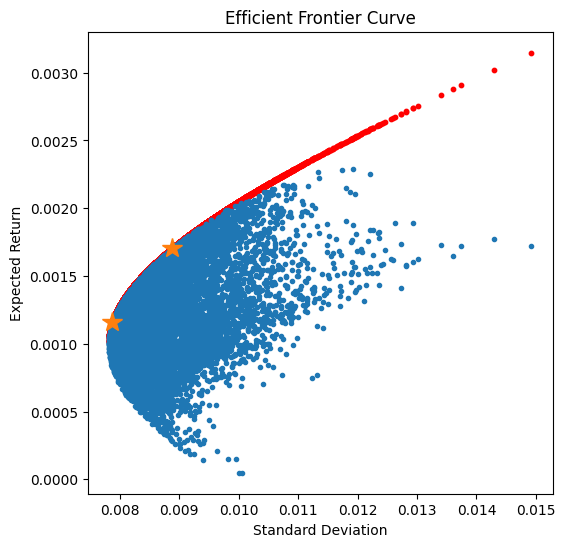

In [53]:
#plot
plt.subplots(figsize=(6,6))
plt.plot(sigmas, mus, '.')
plt.plot(chosen_sigmas_new, frontier_returns_new,'*', markersize=15)
plt.scatter(sigmas, frontier_returns, c='r', s=10)
plt.title('Efficient Frontier Curve')
plt.xlabel('Standard Deviation')
plt.ylabel('Expected Return')
plt.show()